In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import lmfit
import corner

In [2]:
#Jassal parametrization:
def wz(z1,w0,w1):
    wz1=w0 + w1*(z1/(1+z1)**2)
    return wz1

In [3]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01, 1000., num=num_zs)

In [4]:
w_0=-1.03
w_1=0.95

In [5]:
w_z=wz(zs,w_0,w_1)

In [6]:
#random error for wz
error_sigma = 0.02
e1 = np.random.uniform(0., error_sigma, w_z.shape)

In [7]:
w_zz= w_z + e1

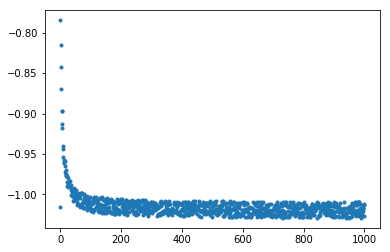

In [8]:
plt.plot(zs,w_zz, '.')

In [9]:
p = lmfit.Parameters()
p.add_many(('w0',-1.,True,-3.,3.),
           ('w1',1.,True,-2.,2.))

def residual(p):
    v = p.valuesdict()
    return (wz(zs,v['w0'],v['w1'])-w_zz)/error_sigma

In [10]:
mi = lmfit.minimize(residual, p, method='leastsq', nan_policy='omit')

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 1000
    # variables        = 2
    chi-square         = 82.1562388
    reduced chi-square = 0.08232088
    Akaike info crit   = -2495.13249
    Bayesian info crit = -2485.31698
[[Variables]]
    w0: -1.01990428 +/- 1.9195e-04 (0.02%) (init = -1)
    w1:  0.94300430 +/- 0.01070829 (1.14%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(w0, w1) = -0.326


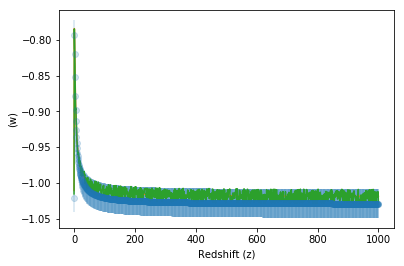

In [11]:
plt.errorbar(zs,w_z,yerr=error_sigma,fmt='o',alpha=0.2)
#bestOde1= mi.params.valuesdict()['Ode1']
bestw0 = mi.params.valuesdict()['w0']
bestw1 = mi.params.valuesdict()['w1']
plt.plot(zs,wz(zs,bestw0,bestw1))
plt.plot(zs,w_zz)
plt.xlabel('Redshift (z)')
plt.ylabel('(w)')
lmfit.report_fit(mi)

In [12]:
res = lmfit.minimize(residual, method='emcee', nan_policy='omit', burn=300, steps=1500, thin=1,
                         params=p, is_weighted=True)

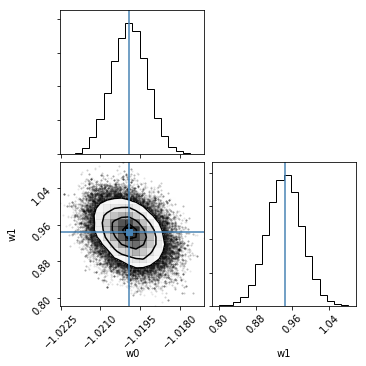

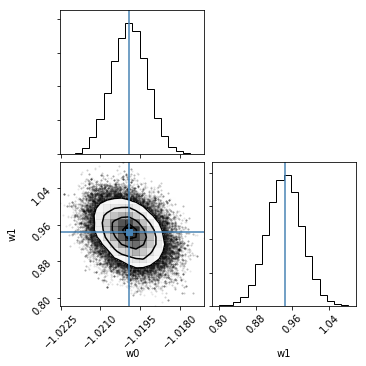

In [13]:
corner.corner(res.flatchain,labels=res.var_names, truths=list(res.params.valuesdict().values()))

In [7]:
#CPL parametrization:
def w_z2(z2,w0_1,w1_1):
    wz2=w0_1 + (w1_1)*(z2/(1+z2))
    return wz2

In [8]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01, 10., num=num_zs)

In [9]:
w_0=-1.09
w_1=0.43

In [10]:
w_z1=w_z2(zs,w_0,w_1)

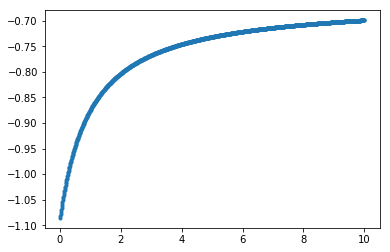

In [11]:
plt.plot(zs,w_z1, '.')

In [12]:
#Barboza & Alcaniz  parametrization w(z)=w0+w1*z*(1+z)/1+z^2 :
def w_z3(z3,w0_2,w1_2):
    wz3=w0_2 + w1_2*(z3*(1+z3))/(1+z3**2)
    return wz3

In [13]:
#Define  random redshifts
num_zs = 1000
zs= np.linspace(0.01, 10., num=num_zs)

In [14]:
w_0=-1.08
w_1=0.23

In [15]:
w_z2=w_z3(zs,w_0,w_1)

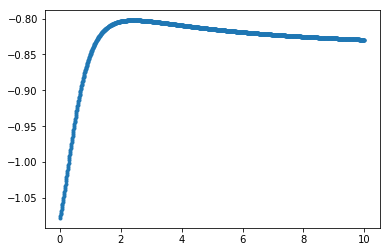

In [16]:
plt.plot(zs,w_z2, '.')